Calculate k-means with  2  clusters.
Calculate k-means with  3  clusters.
Calculate k-means with  4  clusters.
Calculate k-means with  5  clusters.
Calculate k-means with  6  clusters.
Calculate k-means with  7  clusters.
Calculate k-means with  8  clusters.


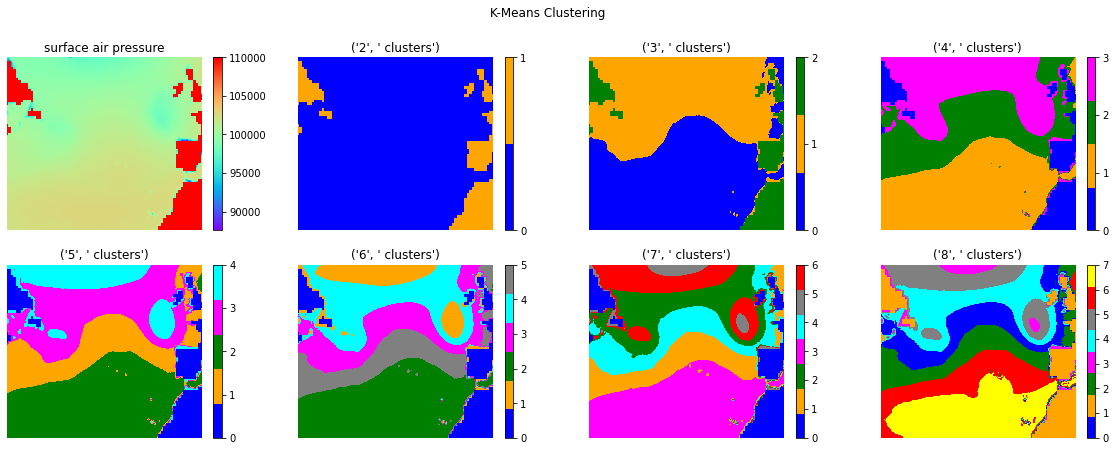

In [ ]:
import netCDF4
import numpy as np
from scipy.cluster.vq import *
from matplotlib import colors as c
import matplotlib.pyplot as plt
%matplotlib inline

f = netCDF4.Dataset('sp_minima_0.nc', 'r')
lats = f.variables['latitude'][:]
lons = f.variables['longitude'][:]
sp = f.variables['surface_air_pressure'][:]
sp = np.nan_to_num(sp)

# Flatten image to get line of values
flatraster = sp.flatten()
flatraster.mask = False
flatraster = flatraster.data

# Create figure to receive results
fig = plt.figure(figsize=[20,7])
fig.suptitle('K-Means Clustering')

# In first subplot add original image
ax = plt.subplot(241)
ax.axis('off')
ax.set_title('surface air pressure')
original=ax.imshow(sp, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()
# In remaining subplots add k-means clustered images
# Define colormap
list_colors=['blue','orange', 'green', 'magenta', 'cyan', 'gray', 'red', 'yellow']
for i in range(7):
    print("Calculate k-means with ", i+2, " clusters.")
    
    #This scipy code clusters k-mean, code has same length as flattened
    # raster and defines which cluster the value corresponds to
    centroids, variance = kmeans(flatraster.astype(float), i+2)
    code, distance = vq(flatraster, centroids)
    
    #Since code contains the clustered values, reshape into SAR dimensions
    codeim = code.reshape(sp.shape[0], sp.shape[1])
    
    #Plot the subplot with (i+2)th k-means
    ax = plt.subplot(2,4,i+2)
    ax.axis('off')
    xlabel = str(i+2) , ' clusters'
    ax.set_title(xlabel)
    bounds=range(0,i+2)
    cmap = c.ListedColormap(list_colors[0:i+2])
    kmp=ax.imshow(codeim, interpolation='nearest', aspect='auto', cmap=cmap,  origin='lower')
    plt.colorbar(kmp, cmap=cmap,  ticks=bounds, ax=ax, orientation='vertical')
    plt.gca().invert_yaxis()
plt.show()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Find contours
centroids, variance = kmeans(flatraster.astype(float), 5) #number changes every time
code, distance = vq(flatraster, centroids)
codeim = code.reshape(sp.shape[0], sp.shape[1])


(5521, 2)
2690.4780281578214
(3293, 2)
884.2867408256216
(2313, 2)
461.3031974742858
(1155, 2)
375.0811112279582
(1209, 2)
442.39353521497105


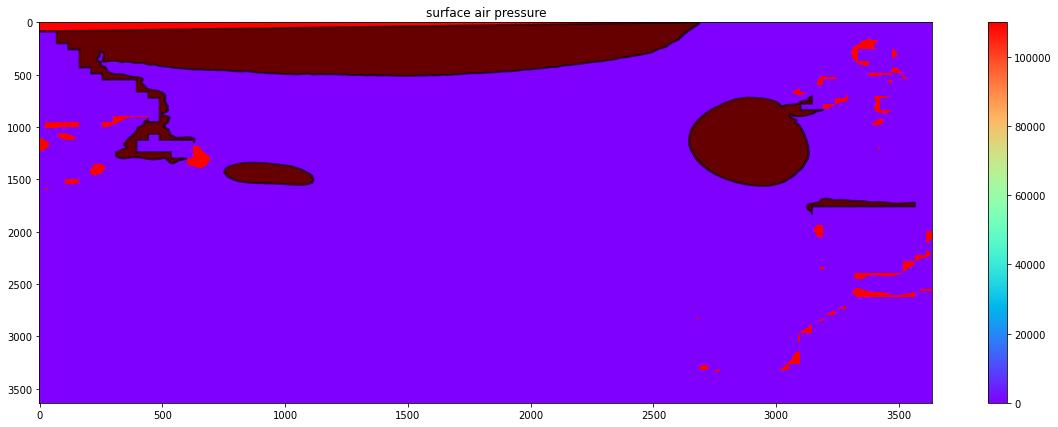

In [ ]:
thresholded = np.zeros(codeim.shape)
thresholded[codeim==1] = 110000 #codeim changes everytime
contours = measure.find_contours(thresholded, 99000)

# Display the image and plot all contours found
fig = plt.figure(figsize=[20,7])
ax = plt.subplot()
ax.set_title('surface air pressure')
original=ax.imshow(thresholded, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()
from scipy.spatial import distance #if based on shape was an option: more spherical ones would be chosen
for n, contour in enumerate(contours):
    dists = distance.cdist(contour, contour, 'euclidean') #chebyshev also works the same for me
    if dists.max() > 350: #this number needs to be changed everytime.
        ax.fill(contour[:, 1], contour[:, 0], linewidth=2, color='black', alpha=0.6)
        print(contour.shape)
        print(dists.max())

In [ ]:

# if sp != sp[contour[:,1].astype(int)]:
#   sp = 110000
#   print(sp)
# sp[contour[:,1].astype(int)].shape
f = netCDF4.Dataset('sp_minima_0.nc', 'r')
lats = f.variables['latitude'][:]
lons = f.variables['longitude'][:]
sp = f.variables['surface_air_pressure'][:]
sp = np.nan_to_num(sp)
sp_cont = sp[contour[:,1].astype(int)]
if sp_cont == sp:
  print('f')
print(sp.shape)
sp_cont

(3636, 3636)


masked_array(
  data=[[101929.5625   , 101931.3515625, 101933.140625 , ...,
         110000.       , 110000.       , 110000.       ],
        [101927.5625   , 101929.3984375, 101931.2265625, ...,
         110000.       , 110000.       , 110000.       ],
        [101925.5625   , 101927.4375   , 101929.3125   , ...,
         110000.       , 110000.       , 110000.       ],
        ...,
        [101931.5625   , 101933.3125   , 101935.0625   , ...,
         110000.       , 110000.       , 110000.       ],
        [101929.5625   , 101931.3515625, 101933.140625 , ...,
         110000.       , 110000.       , 110000.       ],
        [101929.5625   , 101931.3515625, 101933.140625 , ...,
         110000.       , 110000.       , 110000.       ]],
  mask=False,
  fill_value=1e+20)

Calculate k-means with  2  clusters.
Calculate k-means with  3  clusters.
Calculate k-means with  4  clusters.
Calculate k-means with  5  clusters.


/usr/local/lib/python3.7/dist-packages/scipy/cluster/vq.py:607: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


Calculate k-means with  6  clusters.
Calculate k-means with  7  clusters.
Calculate k-means with  8  clusters.


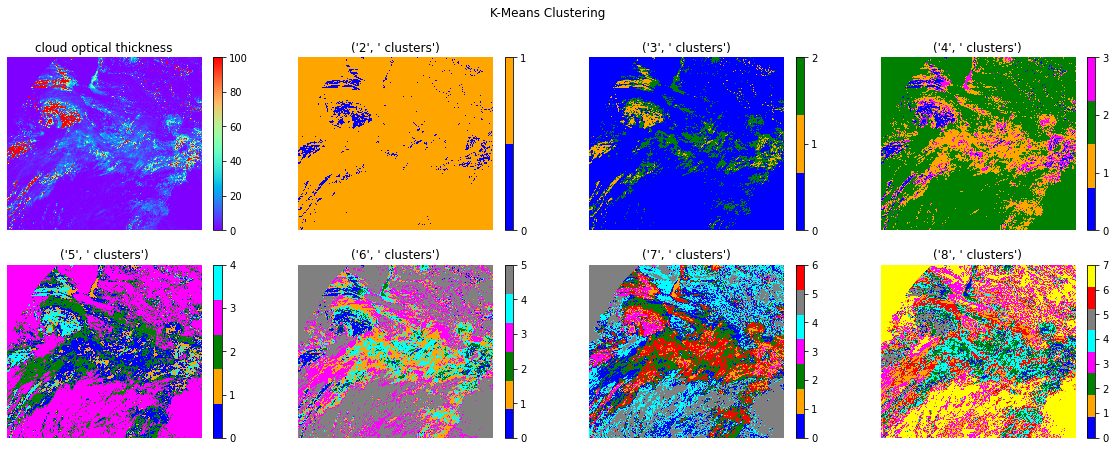

In [ ]:
import netCDF4
import numpy as np
from scipy.cluster.vq import *
from matplotlib import colors as c
import matplotlib.pyplot as plt
%matplotlib inline

f = netCDF4.Dataset('CPPin20160210120000305SVMSGE1MD_new.nc', 'r')
f.variables
lats = f.variables['latitude'][:]
lons = f.variables['longitude'][:]
pw = f.variables['atmosphere_optical_thickness_due_to_cloud'][:]
pw = np.nan_to_num(pw)

flatraster = pw.flatten()
flatraster.mask = False
flatraster = flatraster.data

# Create figure to receive results
fig = plt.figure(figsize=[20,7])
fig.suptitle('K-Means Clustering')

# In first subplot add original image
ax = plt.subplot(241)
ax.axis('off')
ax.set_title('cloud optical thickness')
original=ax.imshow(pw, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()
# In remaining subplots add k-means clustered images
# Define colormap
list_colors=['blue','orange', 'green', 'magenta', 'cyan', 'gray', 'red', 'yellow']
for i in range(7):
    print("Calculate k-means with ", i+2, " clusters.")
    
    #This scipy code clusters k-mean, code has same length as flattened
    # raster and defines which cluster the value corresponds to
    centroids, variance = kmeans2(flatraster.astype(float), i+2, minit='points')
    code, distance = vq(flatraster, centroids)
    
    #Since code contains the clustered values, reshape into SAR dimensions
    codeim = code.reshape(pw.shape[0], pw.shape[1])
    
    #Plot the subplot with (i+2)th k-means
    ax = plt.subplot(2,4,i+2)
    ax.axis('off')
    xlabel = str(i+2) , ' clusters'
    ax.set_title(xlabel)
    bounds=range(0,i+2)
    cmap = c.ListedColormap(list_colors[0:i+2])
    kmp=ax.imshow(codeim, interpolation='nearest', aspect='auto', cmap=cmap,  origin='lower')
    plt.colorbar(kmp, cmap=cmap,  ticks=bounds, ax=ax, orientation='vertical')
    plt.gca().invert_yaxis()
plt.show()



In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Find contours
centroids2, variance2 = kmeans2(flatraster.astype(float), 8, minit='points')
code2, distance2 = vq(flatraster, centroids2)
#Since code contains the clustered values, reshape into SAR dimensions
codeim2 = code2.reshape(pw.shape[0], pw.shape[1])

363.0198892622826
339.3783139801363
441.21813199368864
147.30458241344695
371.0561143546889
304.78064242992866
176.5056373037417
473.9004536819942
435.1420917355617
148.39690023716787
234.7459051826038
446.28558121454023
145.7211034819595
146.80613066217623
145.11802093468597
438.86676793760523
159.89321436508789
187.789350070764


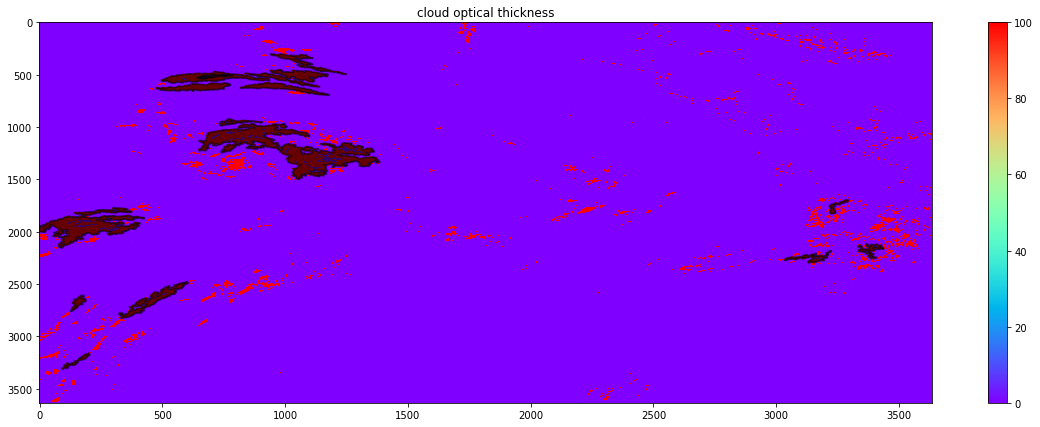

In [ ]:
thresholded2 = np.zeros(codeim2.shape)
thresholded2[codeim==5] = 100
contours2 = measure.find_contours(thresholded2, 90)

# Display the image and plot all contours found
fig = plt.figure(figsize=[20,7])
ax = plt.subplot()
ax.set_title('cloud optical thickness')
original2=ax.imshow(thresholded2, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original2, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()
from scipy.spatial import distance
for n, contour in enumerate(contours2):
    dists2 = distance.cdist(contour, contour, 'euclidean')
    if dists2.max() > 140:
        ax.fill(contour[:, 1], contour[:, 0], linewidth=1.5, color='black', alpha=.6)
        print(dists2.max())

Calculate k-means with  2  clusters.
Calculate k-means with  3  clusters.


/usr/local/lib/python3.7/dist-packages/scipy/cluster/vq.py:607: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


Calculate k-means with  4  clusters.
Calculate k-means with  5  clusters.
Calculate k-means with  6  clusters.
Calculate k-means with  7  clusters.
Calculate k-means with  8  clusters.


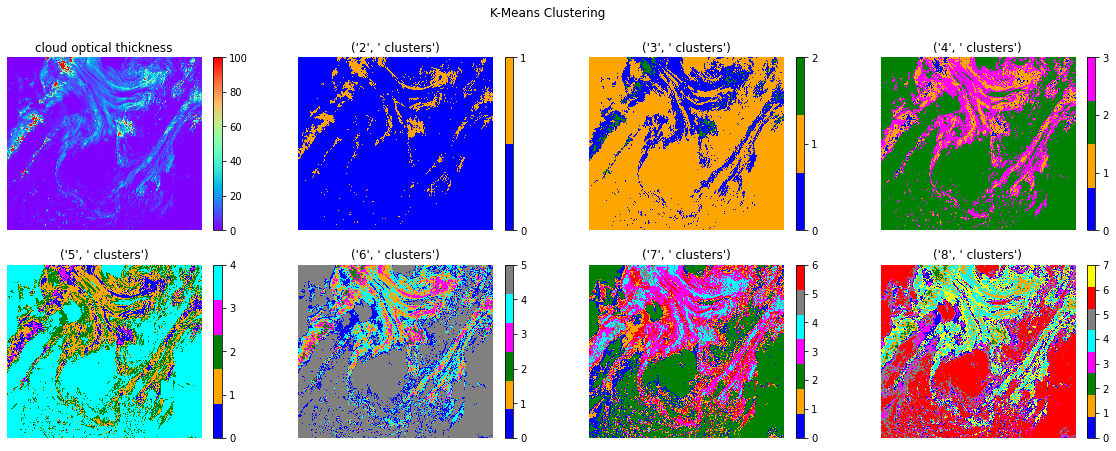

In [ ]:
import netCDF4
import numpy as np
from scipy.cluster.vq import *
from matplotlib import colors as c
import matplotlib.pyplot as plt
%matplotlib inline

f = netCDF4.Dataset('CPPin20160622120000305SVMSGE1MD_new.nc', 'r')
f.variables
lats = f.variables['latitude'][:]
lons = f.variables['longitude'][:]
pw = f.variables['atmosphere_optical_thickness_due_to_cloud'][:]
pw = np.nan_to_num(pw)

flatraster = pw.flatten()
flatraster.mask = False
flatraster = flatraster.data

# Create figure to receive results
fig = plt.figure(figsize=[20,7])
fig.suptitle('K-Means Clustering')

# In first subplot add original image
ax = plt.subplot(241)
ax.axis('off')
ax.set_title('cloud optical thickness')
original=ax.imshow(pw, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()
# In remaining subplots add k-means clustered images
# Define colormap
list_colors=['blue','orange', 'green', 'magenta', 'cyan', 'gray', 'red', 'yellow']
for i in range(7):
    print("Calculate k-means with ", i+2, " clusters.")
    
    #This scipy code clusters k-mean, code has same length as flattened
    # raster and defines which cluster the value corresponds to
    centroids, variance = kmeans2(flatraster.astype(float), i+2, minit='points')
    code, distance = vq(flatraster, centroids)
    
    #Since code contains the clustered values, reshape into SAR dimensions
    codeim = code.reshape(pw.shape[0], pw.shape[1])
    
    #Plot the subplot with (i+2)th k-means
    ax = plt.subplot(2,4,i+2)
    ax.axis('off')
    xlabel = str(i+2) , ' clusters'
    ax.set_title(xlabel)
    bounds=range(0,i+2)
    cmap = c.ListedColormap(list_colors[0:i+2])
    kmp=ax.imshow(codeim, interpolation='nearest', aspect='auto', cmap=cmap,  origin='lower')
    plt.colorbar(kmp, cmap=cmap,  ticks=bounds, ax=ax, orientation='vertical')
    plt.gca().invert_yaxis()
plt.show()



In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Find contours
centroids2, variance2 = kmeans2(flatraster.astype(float), 8, minit='points')
code2, distance2 = vq(flatraster, centroids2)
#Since code contains the clustered values, reshape into SAR dimensions
codeim2 = code2.reshape(pw.shape[0], pw.shape[1])

/usr/local/lib/python3.7/dist-packages/scipy/cluster/vq.py:607: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


480.60713685920234
232.0362902651221
395.4208391068939
278.9179807757112
337.65047016108247
279.6970503956022
261.16783875508105
209.31899101610446
281.5955255326335
201.43296651740008
528.7005201434929
940.504885686406
225.71982633344368
220.38747695819728
221.17016073602682
275.42991849107443
222.0185577829023
364.7435263304887
325.4904606897104
273.2120787959418
266.75126991262835
419.7685552777863
234.17224429893463
220.2036330308833
320.01131230004967
256.8813734002524
448.6547001871259
261.9634325626383
225.1600319772582
346.69877415416386
263.03125289592475
289.0799889303995
312.219217858222
273.5705393495431
534.9955513833735
233.3153231144494
617.8344762151104
240.56275688476788
206.0777523169348


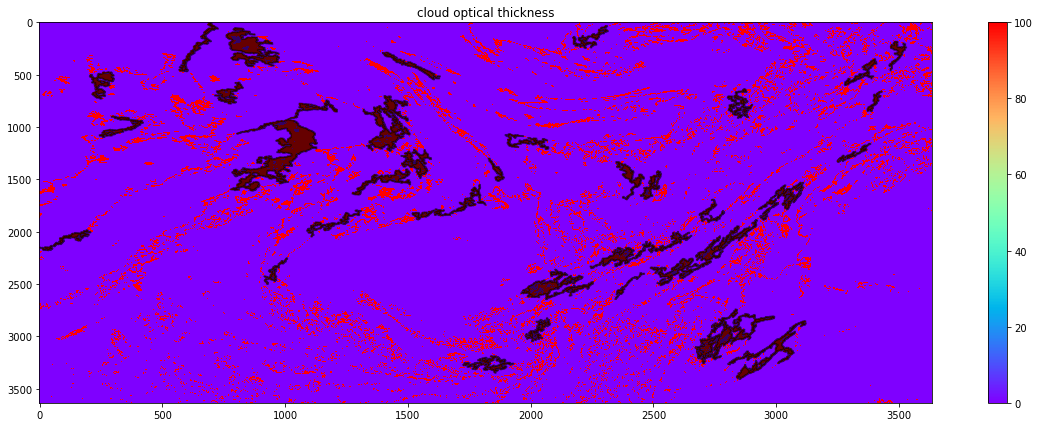

In [ ]:
thresholded2 = np.zeros(codeim2.shape)
thresholded2[codeim==0] = 100
contours2 = measure.find_contours(thresholded2, 90)

# Display the image and plot all contours found
fig = plt.figure(figsize=[20,7])
ax = plt.subplot()
ax.set_title('cloud optical thickness')
original2=ax.imshow(thresholded2, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original2, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()
from scipy.spatial import distance
for n, contour in enumerate(contours2):
    dists2 = distance.cdist(contour, contour, 'euclidean')
    if dists2.max() > 200:
        ax.fill(contour[:, 1], contour[:, 0], linewidth=1.5, color='black', alpha=.6)
        print(dists2.max())

Calculate k-means with  2  clusters.
Calculate k-means with  3  clusters.
Calculate k-means with  4  clusters.


/usr/local/lib/python3.7/dist-packages/scipy/cluster/vq.py:607: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


Calculate k-means with  5  clusters.
Calculate k-means with  6  clusters.
Calculate k-means with  7  clusters.
Calculate k-means with  8  clusters.


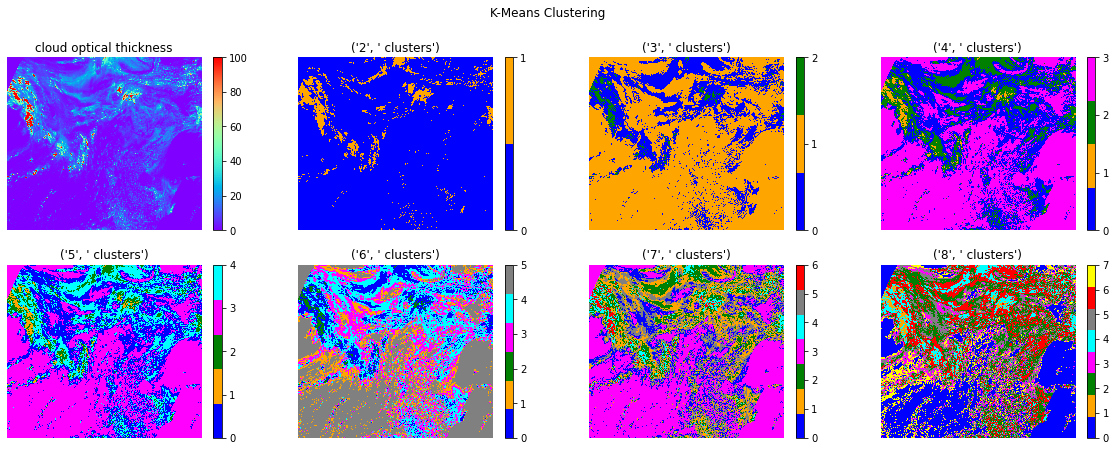

In [ ]:
import netCDF4
import numpy as np
from scipy.cluster.vq import *
from matplotlib import colors as c
import matplotlib.pyplot as plt
%matplotlib inline

f = netCDF4.Dataset('CPPin20160703120000305SVMSGE1MD_new.nc', 'r')
f.variables
lats = f.variables['latitude'][:]
lons = f.variables['longitude'][:]
pw = f.variables['atmosphere_optical_thickness_due_to_cloud'][:]
pw = np.nan_to_num(pw)

flatraster = pw.flatten()
flatraster.mask = False
flatraster = flatraster.data

# Create figure to receive results
fig = plt.figure(figsize=[20,7])
fig.suptitle('K-Means Clustering')

# In first subplot add original image
ax = plt.subplot(241)
ax.axis('off')
ax.set_title('cloud optical thickness')
original=ax.imshow(pw, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()
# In remaining subplots add k-means clustered images
# Define colormap
list_colors=['blue','orange', 'green', 'magenta', 'cyan', 'gray', 'red', 'yellow']
for i in range(7):
    print("Calculate k-means with ", i+2, " clusters.")
    
    #This scipy code clusters k-mean, code has same length as flattened
    # raster and defines which cluster the value corresponds to
    centroids, variance = kmeans2(flatraster.astype(float), i+2, minit='points')
    code, distance = vq(flatraster, centroids)
    
    #Since code contains the clustered values, reshape into SAR dimensions
    codeim = code.reshape(pw.shape[0], pw.shape[1])
    
    #Plot the subplot with (i+2)th k-means
    ax = plt.subplot(2,4,i+2)
    ax.axis('off')
    xlabel = str(i+2) , ' clusters'
    ax.set_title(xlabel)
    bounds=range(0,i+2)
    cmap = c.ListedColormap(list_colors[0:i+2])
    kmp=ax.imshow(codeim, interpolation='nearest', aspect='auto', cmap=cmap,  origin='lower')
    plt.colorbar(kmp, cmap=cmap,  ticks=bounds, ax=ax, orientation='vertical')
    plt.gca().invert_yaxis()
plt.show()



In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Find contours
centroids2, variance2 = kmeans2(flatraster.astype(float), 8, minit='points')
code2, distance2 = vq(flatraster, centroids2)
#Since code contains the clustered values, reshape into SAR dimensions
codeim2 = code2.reshape(pw.shape[0], pw.shape[1])

233.40145672210343
1565.5044043374646
295.0268462360672
540.4635417861226
1353.1208519566903
202.43675555590198
224.7047841057238
223.97732028042466
211.92696855284822
807.0855221102655
262.69800151504774
251.20796165726895
217.2998849516491
448.5283045695108
215.4173623457497
336.8338462803284
236.86798010706286
1259.078170726504
260.77430855051637
233.89365104679501
208.3133217055499
1175.1745572467096
241.97198184913907
494.1117687325408
343.81047104473146
207.39537121160618
257.7534480855686
215.04380949006662
276.88163536067157
403.4719816790255
248.51084483378168
546.3338173680994
279.66987681908097
286.24367241914695
504.2737748485438
317.00763397747994
315.51076051380556
417.29610590083377
254.35888032463095
212.80939828870345
279.7170713417397
334.25415479841064
396.39682137978843
582.0337103639272
201.70037183902252
356.1716440145115
558.886052787149
297.2151409332975
254.89299715763065
320.9885044670602


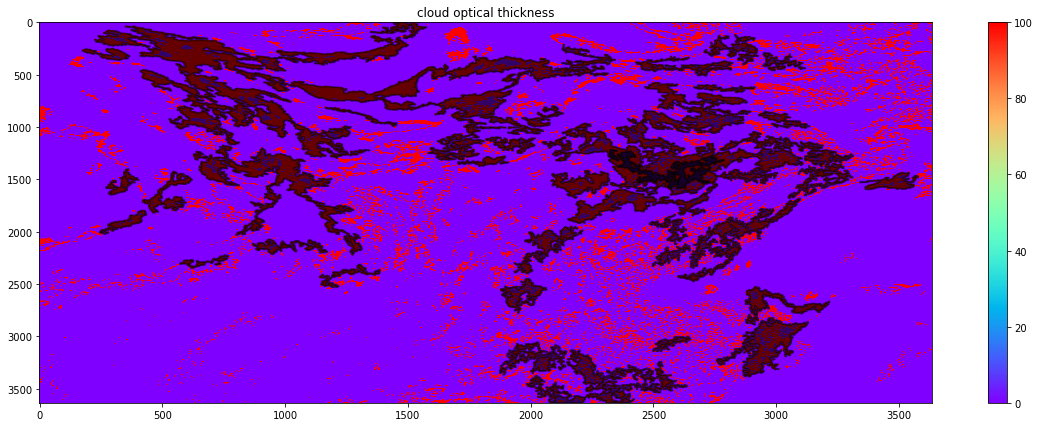

In [ ]:
thresholded2 = np.zeros(codeim2.shape)
thresholded2[codeim==2] = 100
contours2 = measure.find_contours(thresholded2, 90)

# Display the image and plot all contours found
fig = plt.figure(figsize=[20,7])
ax = plt.subplot()
ax.set_title('cloud optical thickness')
original2=ax.imshow(thresholded2, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original2, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()
from scipy.spatial import distance
for n, contour in enumerate(contours2):
    dists2 = distance.cdist(contour, contour, 'euclidean')
    if dists2.max() > 200:
        ax.fill(contour[:, 1], contour[:, 0], linewidth=1.5, color='black', alpha=.6)
        print(dists2.max())

#area of convex hulls

In [ ]:
import netCDF4
import numpy as np
from scipy.cluster.vq import *
from matplotlib import colors as c
import matplotlib.pyplot as plt
%matplotlib inline

f = netCDF4.Dataset('sp_minima_0.nc', 'r')
lats = f.variables['latitude'][:]
lons = f.variables['longitude'][:]
sp = f.variables['surface_air_pressure'][:]
sp = np.nan_to_num(sp)

# Flatten image to get line of values
flatraster = sp.flatten()
flatraster.mask = False
flatraster = flatraster.data

# Create figure to receive results
fig = plt.figure(figsize=[20,7])
fig.suptitle('K-Means Clustering')

# In first subplot add original image
ax = plt.subplot(241)
ax.axis('off')
ax.set_title('surface air pressure')
original=ax.imshow(sp, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()
# In remaining subplots add k-means clustered images
# Define colormap
list_colors=['blue','orange', 'green', 'magenta', 'cyan', 'gray', 'red', 'yellow']
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Find contours
centroids, variance = kmeans(flatraster.astype(float), 5) #number changes every time
code, distance = vq(flatraster, centroids)
codeim = code.reshape(sp.shape[0], sp.shape[1])


2724.4608310636436
area: 1421860.2000000004
257.6971866357878
area: 33214.519999999975
17.799999999999955
area: 51.92000000000019
134.4144337487608
area: 3779.119999999966
102.30562056895975
area: 2850.8199999999993
124.05579389935791
area: 5724.420000000011
50.200000000000045
area: 560.4199999999967
82.29726605422569
area: 2985.2199999999907
960.5462196063237
area: 421233.0199999999
175.36658746751053
area: 10964.019999999968
536.198321519193
area: 121417.12
217.28884002635758
area: 10751.120000000003
78.13859481715792
area: 2337.0199999999913
172.53759010719955
area: 8643.060000000007
91.70081788075828
area: 3844.419999999989
134.21490230224046
area: 3963.409999999999
37.25372464599998
area: 284.01999999999583
403.1846227226429
area: 78078.61999999994
119.29559924825374
area: 5487.619999999994
85.8920252409966
area: 3306.4199999999896
28.76178019525217
area: 215.319999999996
442.7019765033807
area: 42186.719999999936
32.19999999999982
area: 27.919999999993824
119.29811398341533
area:

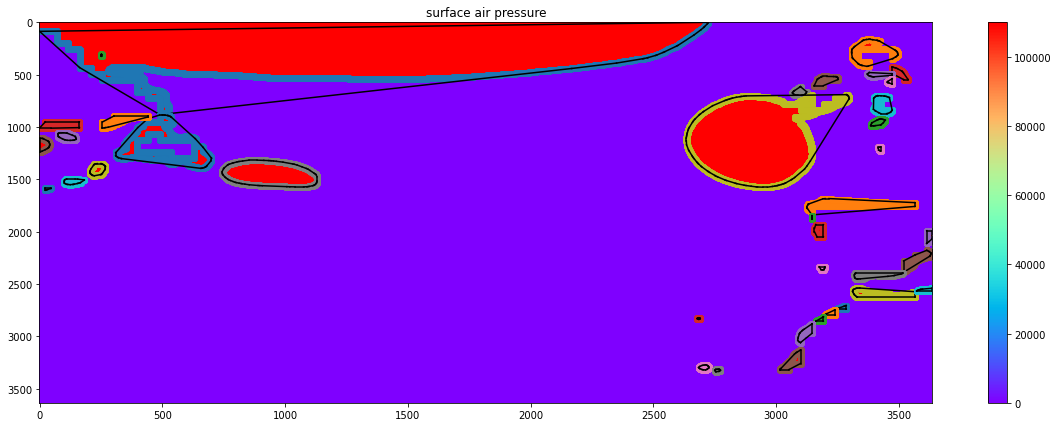

In [ ]:
thresholded = np.zeros(codeim.shape)
thresholded[codeim==1] = 110000 #codeim changes everytime
contours = measure.find_contours(thresholded, 99000)

# Display the image and plot all contours found
fig = plt.figure(figsize=[20,7])
ax = plt.subplot()
ax.set_title('surface air pressure')
original=ax.imshow(thresholded, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()
from scipy.spatial import distance #if based on shape was an option: more spherical ones would be chosen
from scipy.spatial import ConvexHull
cluster_areas = []
for n, contour in enumerate(contours):
        dists = distance.cdist(contour, contour, 'euclidean') #chebyshev also works the same for me
    #if dists.max() > 350: #this number needs to be changed everytime.
        #ax.fill(contour[:, 1], contour[:, 0], linewidth=2, color='black', alpha=0.6)
        print(dists.max())
        hull = ConvexHull(contour)
        cluster_areas.append(hull.volume)
        plt.plot(contour[:,1], contour[:,0], 'o')
        for simplex in hull.simplices:
          plt.plot(contour[simplex, 1], contour[simplex, 0], 'k-')
        print(f'area: {hull.volume}') #Volume of the convex hull when input dimension > 2. When input points are 2-dimensional, this is the area of the convex hull.
print(cluster_areas)
#create empty list and for every iteration store hull.volume in it and take mean or something and if vol>mean, then give contour

In [ ]:
cluster_areas

[1421860.2000000004,
 33214.519999999975,
 51.92000000000019,
 3779.119999999966,
 2850.8199999999993,
 5724.420000000011,
 560.4199999999967,
 2985.2199999999907,
 421233.0199999999,
 10964.019999999968,
 121417.12,
 10751.120000000003,
 2337.0199999999913,
 8643.060000000007,
 3844.419999999989,
 3963.409999999999,
 284.01999999999583,
 78078.61999999994,
 5487.619999999994,
 3306.4199999999896,
 215.319999999996,
 42186.719999999936,
 27.919999999993824,
 3841.2199999999675,
 2214.059999999995,
 9745.719999999948,
 469.9199999999929,
 7487.819999999939,
 17422.919999999925,
 1149.3099999999872,
 709.2199999999959,
 1142.119999999973,
 644.4199999999796,
 115.21999999999673,
 5279.319999999932,
 7198.2199999999775,
 1407.3199999999847,
 405.8199999999966]

In [ ]:
area = [area_wanted for area_wanted in cluster_areas if area_wanted >= np.mean(cluster_areas)]
area

[1421860.2000000004, 421233.0199999999, 121417.12, 78078.61999999994]

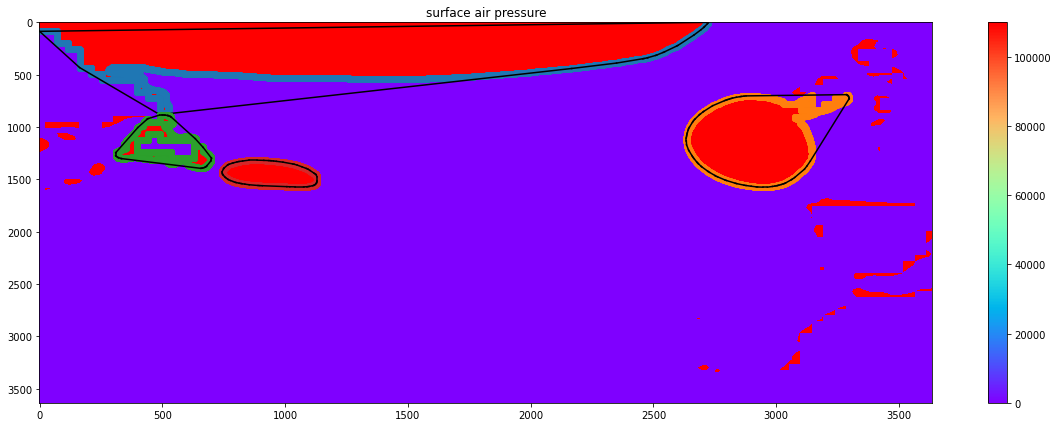

In [ ]:
fig = plt.figure(figsize=[20,7])
ax = plt.subplot()
ax.set_title('surface air pressure')
original=ax.imshow(thresholded, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()
for n, contour in enumerate(contours):
        hull = ConvexHull(contour)
        if hull.volume in area:
          plt.plot(contour[:,1], contour[:,0], 'o')
          for simplex in hull.simplices:
            plt.plot(contour[simplex, 1], contour[simplex, 0], 'k-')

# attempting on cot data now

/usr/local/lib/python3.7/dist-packages/scipy/cluster/vq.py:607: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


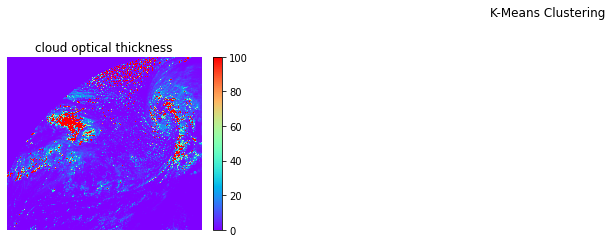

In [ ]:
import netCDF4
import numpy as np
from scipy.cluster.vq import *
from matplotlib import colors as c
import matplotlib.pyplot as plt
%matplotlib inline

f = netCDF4.Dataset('CPPin20160101120000305SVMSGE1MD_new.nc', 'r')
f.variables
lats = f.variables['latitude'][:]
lons = f.variables['longitude'][:]
pw = f.variables['atmosphere_optical_thickness_due_to_cloud'][:]
pw = np.nan_to_num(pw)

flatraster = pw.flatten()
flatraster.mask = False
flatraster = flatraster.data

# Create figure to receive results
fig = plt.figure(figsize=[20,7])
fig.suptitle('K-Means Clustering')

# In first subplot add original image
ax = plt.subplot(241)
ax.axis('off')
ax.set_title('cloud optical thickness')
original=ax.imshow(pw, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()
from skimage import measure

# Find contours
centroids2, variance2 = kmeans2(flatraster.astype(float), 4, minit='points')
code2, distance2 = vq(flatraster, centroids2)
#Since code contains the clustered values, reshape into SAR dimensions
codeim2 = code2.reshape(pw.shape[0], pw.shape[1])

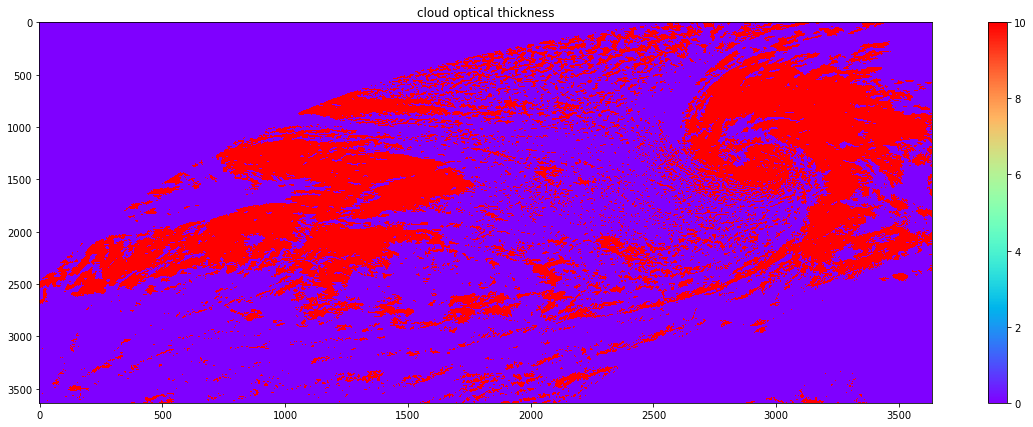

In [ ]:
thresholded2 = np.zeros(codeim2.shape)
thresholded2[codeim2!=3] = 10  #need 0 cluster(1) also.
contours2 = measure.find_contours(thresholded2, 9)
# Display the image and plot all contours found
fig = plt.figure(figsize=[20,7])
ax = plt.subplot()
ax.set_title('cloud optical thickness')
original2=ax.imshow(thresholded2, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original2, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()


area: 28864.319999999952
area: 107497.7199999999
area: 32725.719999999958
area: 2348359.9099999997
area: 52405.61999999995
area: 35354.91999999996
area: 135361.32
area: 122805.92000000009
area: 2018890.5600000003
area: 295133.8100000001
area: 57102.91999999993
area: 43213.41999999989
area: 74026.71999999987
area: 28203.919999999947
[28864.319999999952, 107497.7199999999, 32725.719999999958, 2348359.9099999997, 52405.61999999995, 35354.91999999996, 135361.32, 122805.92000000009, 2018890.5600000003, 295133.8100000001, 57102.91999999993, 43213.41999999989, 74026.71999999987, 28203.919999999947]


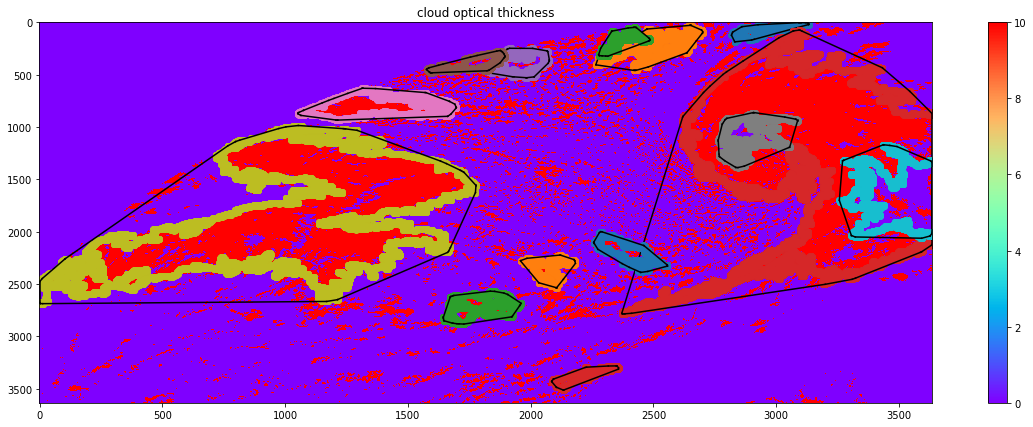

In [ ]:
# Display the image and plot all contours found
fig = plt.figure(figsize=[20,7])
ax = plt.subplot()
ax.set_title('cloud optical thickness')
original2=ax.imshow(thresholded2, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original2, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()
from scipy.spatial import distance #if based on shape was an option: more spherical ones would be chosen
from scipy.spatial import ConvexHull
cluster_areas1 = []
for n, contour in enumerate(contours2):
    dists = distance.cdist(contour, contour, 'euclidean') #chebyshev also works the same for me
    if dists.max() > 300: #this number needs to be changed everytime.
        #ax.fill(contour[:, 1], contour[:, 0], linewidth=2, color='black', alpha=0.6)
        #print(dists.max())
        hull = ConvexHull(contour)
        cluster_areas1.append(hull.volume)
        plt.plot(contour[:,1], contour[:,0], 'o')
        for simplex in hull.simplices:
          plt.plot(contour[simplex, 1], contour[simplex, 0], 'k-')
        print(f'area: {hull.volume}') #Volume of the convex hull when input dimension > 2. When input points are 2-dimensional, this is the area of the convex hull.
print(cluster_areas1)
#create empty list and for every iteration store hull.volume in it and take mean and if vol>mean, then give contour

In [ ]:
area1 = [area_wanted for area_wanted in cluster_areas1 if area_wanted >= np.percentile(cluster_areas1,90)]
np.size(area1)

2

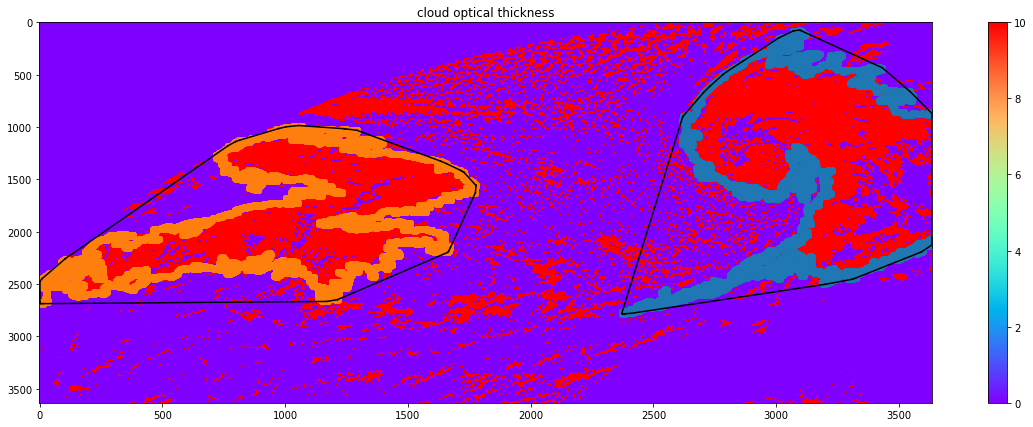

In [ ]:
# Display the image and plot all contours found
fig = plt.figure(figsize=[20,7])
ax = plt.subplot()
ax.set_title('cloud optical thickness')
original2=ax.imshow(thresholded2, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original2, cmap='rainbow', ax=ax, orientation='vertical')
plt.gca().invert_yaxis()
for n, contour in enumerate(contours2):
        hull = ConvexHull(contour)
        if hull.volume in area1:
          plt.plot(contour[:,1], contour[:,0], 'o')
          for simplex in hull.simplices:
            plt.plot(contour[simplex, 1], contour[simplex, 0], 'k-')

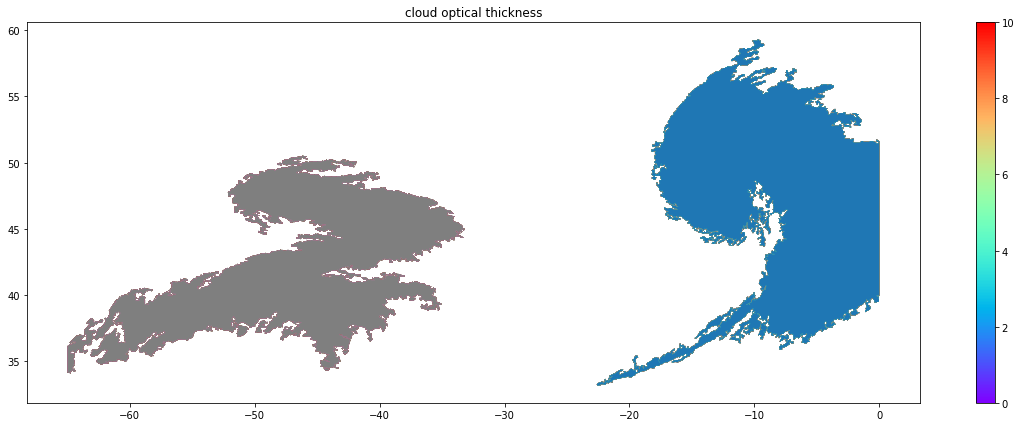

In [ ]:
lons = np.array(lons)
lats = np.array(lats)

# Display the image and plot all contours found
fig = plt.figure(figsize=[20,7])
ax = plt.subplot()
ax.set_title('cloud optical thickness')
plt.colorbar(original2, cmap='rainbow', ax=ax, orientation='vertical')
for n, contour in enumerate(contours2):
        hull = ConvexHull(contour)
        if hull.volume in area1:
          for simplex in hull.simplices:
            lons_cont = lons[contour[:,1].astype(int)]
            lats_cont = lats[contour[:,0].astype(int)]
            filled_object = plt.fill(lons_cont, lats_cont)